In [1]:
import os
import pandas
import numpy
import math
import matplotlib
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample

In [2]:
# Settings
filename = "MA_Public_Schools_2017.csv"
start_year = 2010
stop_year = 2017
y_column_name = "% Graduated"
ignore_columns = [
    "High School Graduates (#)",
    "% Dropped Out",
    "% Still in School",
    "School Code",
    "School Name",
    "Contact Name",
    "Address 1",
    "Address 2",
    "Town",
    "State",
    "Zip",
    "Phone",
    "Fax",
    "District Name",
    "% Still in School",
    "% Non-Grad Completers",
    "% GED",
    "% Dropped Out",
    "% Permanently Excluded",
    "High School Graduates (#)",
    "Attending Coll./Univ. (#)",
    "Accountability and Assistance Description",
    "District_Accountability and Assistance Description",
]
floatify_columns = ["AP_Test Takers", "AP_Tests Taken"]
levelize_columns = ["Accountability and Assistance Level", "District_Accountability and Assistance Level"]
gradify_columns = ["Grade"]

In [3]:
# Load the data
df = pandas.read_csv(filename)

In [4]:
df

,School Code,School Name,School Type,Function,Contact Name,Address 1,Address 2,Town,State,Zip,...,MCAS_10thGrade_English_Incl. in SGP(#),Accountability and Assistance Level,Accountability and Assistance Description,School Accountability Percentile (1-99),Progress and Performance Index (PPI) - All Students,Progress and Performance Index (PPI) - High Needs Students,District_Accountability and Assistance Level,District_Accountability and Assistance Description,District_Progress and Performance Index (PPI) - All Students,District_Progress and Performance Index (PPI) - High Needs Students
0,10505,Abington High,Public School,Principal,Teresa Sullivan-Cruz,201 Gliniewicz Way,NaN,Abington,MA,2351,...,111.0,Level 1,Meeting gap narrowing goals,42.0,76.0,75.0,Level 3,One or more schools in the district classified...,63.0,60.0
1,10003,Beaver Brook Elementary School,Public School,Principal,Catherine Zinni,1 Ralph Hamlin Lane,NaN,Abington,MA,2351,...,NaN,Level 3,Among lowest performing 20% of subgroups,34.0,69.0,73.0,Level 3,One or more schools in the district classified...,63.0,60.0
2,10002,Center Elementary School,Public School,Principal,Lora Monachino,201 Gliniewicz Way,NaN,Abington,MA,2351,...,NaN,Insufficient data,NaN,NaN,NaN,NaN,Level 3,One or more schools in the district classified...,63.0,60.0
3,10405,Frolio Middle School,Public School,Principal,Matthew MacCurtain,201 Gliniewicz Way,NaN,Abington,MA,2351,...,NaN,Level 2,Not meeting gap narrowing goals,40.0,63.0,64.0,Level 3,One or more schools in the district classified...,63.0,60.0
4,10015,Woodsdale Elementary School,Public School,Principal,Jonathan Hawes,128 Chestnut Street,NaN,Abington,MA,2351,...,NaN,Level 2,Not meeting gap narrowing goals,52.0,65.0,67.0,Level 3,One or more schools in the district classified...,63.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,35060505,Pioneer Charter School of Science II (PCSS-II),Charter School,Principal,Vahit Sevinc,97 Main Street,NaN,Saugus,MA,1906,...,30.0,Insufficient data,NaN,NaN,NaN,NaN,Insufficient data,NaN,NaN,NaN
1857,35100205,Springfield Preparatory Charter School,Charter School,Principal,Bill Spirer,370 Pine St.,NaN,Springfield,MA,1105,...,NaN,Insufficient data,NaN,NaN,NaN,NaN,Insufficient data,NaN,NaN,NaN
1858,39020900,TEC Connections Academy Commonwealth Virtual S...,Public School,Principal,Adam Goldberg,141 Mansion Drive,NaN,East Walpole,MA,2032,...,28.0,Level 3,Very low assessment participation (Less than 90%),NaN,NaN,NaN,Level 3,Very low assessment participation (Less than 90%),NaN,NaN
1859,35050405,UP Academy Charter School of Dorchester,Charter School,Principal,Jabari Peddie,35 Westville Street,NaN,Boston,MA,2124,...,NaN,Level 1,Meeting gap narrowing goals,35.0,92.0,98.0,Level 1,Meeting gap narrowing goals,92.0,98.0


In [5]:
for column in df.columns:
    print(column)

School Code
School Name
School Type
Function
Contact Name
Address 1
Address 2
Town
State
Zip
Phone
Fax
Grade
District Name
District Code
PK_Enrollment
K_Enrollment
1_Enrollment
2_Enrollment
3_Enrollment
4_Enrollment
5_Enrollment
6_Enrollment
7_Enrollment
8_Enrollment
9_Enrollment
10_Enrollment
11_Enrollment
12_Enrollment
SP_Enrollment
TOTAL_Enrollment
First Language Not English
% First Language Not English
English Language Learner
% English Language Learner
Students With Disabilities
% Students With Disabilities
High Needs
% High Needs
Economically Disadvantaged
% Economically Disadvantaged
% African American
% Asian
% Hispanic
% White
% Native American
% Native Hawaiian, Pacific Islander
% Multi-Race, Non-Hispanic
% Males
% Females
Total # of Classes
Average Class Size
Number of Students
Salary Totals
Average Salary
FTE Count
In-District Expenditures
Total In-district FTEs
Average In-District Expenditures per Pupil
Total Expenditures
Total Pupil FTEs
Average Expenditures per Pupil
# i

In [6]:
df[y_column_name].describe()

count    376.000000
mean      83.327394
std       21.459396
min        0.000000
25%       82.150000
50%       92.250000
75%       96.200000
max      100.000000
Name: % Graduated, dtype: float64

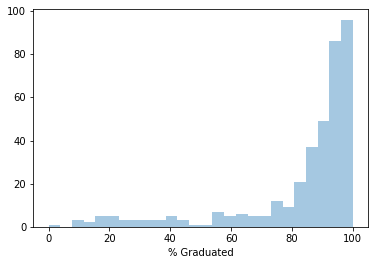

In [7]:
import seaborn

seaborn.distplot(df[y_column_name], kde=False)

In [8]:
df[y_column_name].isna().sum() / df.shape[0]

0.7979580870499732

In [9]:
# Get rid of errored/confusing data
df_slim = df
for column in ignore_columns:
    if column in df_slim.columns:
        df_slim = df_slim.drop(column, 1)

In [10]:
# Columns that were removed
for column in df.columns:
    if column not in df_slim.columns:
        print(column)

School Code
School Name
Contact Name
Address 1
Address 2
Town
State
Zip
Phone
Fax
District Name
% Still in School
% Non-Grad Completers
% GED
% Dropped Out
% Permanently Excluded
High School Graduates (#)
Attending Coll./Univ. (#)
Accountability and Assistance Description
District_Accountability and Assistance Description


In [11]:
df_slim.isna().sum().sum()

368130

In [12]:
# Fix Data
df_clean = df_slim

for column in floatify_columns:
    for row in range(df_clean.shape[0]):
        if type(df_clean.loc[row, column]) is str:
            df_clean.loc[row, column] = float(df_clean.loc[row, column].replace(',', ''))

for column in levelize_columns:
    for row in range(df_clean.shape[0]):
        value = df_clean.loc[row, column]
        if value == "Insufficient data":
            df_clean.loc[row, column] = None
        elif value == "Level 1":
            df_clean.loc[row, column] = 1
        elif df_clean.loc[row, column] == "Level 2":
            df_clean.loc[row, column] = 2
        elif df_clean.loc[row, column] == "Level 3":
            df_clean.loc[row, column] = 3
        elif df_clean.loc[row, column] == "Level 4":
            df_clean.loc[row, column] = 4
        elif df_clean.loc[row, column] == "Level 5":
            df_clean.loc[row, column] = 5

grades = ["PK", "K", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]

for grade in grades:
    df_clean["Grade " + grade] = numpy.full(df_clean.shape[0], 0)

for column in gradify_columns:
    for row in range(df_clean.shape[0]):
        if type(df_clean.loc[row, column]) is not float:
            for current_grade in df_clean.loc[row, column].replace("0", "").split(","):
                df_clean.loc[row, "Grade " + current_grade] = 1

In [13]:
df_clean.isna().sum().sum()

368383

In [14]:
df_fixed_column = df_clean[df_clean[y_column_name].notna()]
df_fixed_column.shape

(376, 296)

In [15]:
# Fix NA's
df_no_na = df_fixed_column.copy().fillna(df_fixed_column.mean()).fillna(df_fixed_column.mode()).dropna(1)

In [16]:
# Columns that were removed
for column in df_slim.columns:
    if column not in df_no_na.columns:
        print(column)

AP_Test Takers
AP_Tests Taken
MCAS_3rdGrade_Math_SGP
MCAS_3rdGrade_Math_Incl. in SGP(#)
MCAS_3rdGrade_English_SGP
MCAS_3rdGrade_English_Incl. in SGP(#)
Accountability and Assistance Level
District_Accountability and Assistance Level


In [29]:
df_selected_features = df_no_na

x = df_selected_features.drop(y_column_name, 1)
y = df_selected_features[y_column_name]

x_encoded = x.apply(LabelEncoder().fit_transform)
# x_normalized = Normalizer().fit_transform(x_encoded)

x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.5)

In [30]:
df_train = pandas.merge(pandas.DataFrame(x_train), pandas.DataFrame(y_train), left_index=True, right_index=True)

df_train = resample(df_train, n_samples=int(df_train.shape[0] * 3))

x_train = df_train.drop(y_column_name, 1)
y_train = df_train[y_column_name]

In [31]:
# normalizer = Normalizer().fit(x_train)
# x_train = normalizer.transform(x_train)
# x_test = normalizer.transform(x_test)

In [37]:
# selection = RFECV(AdaBoostRegressor(), cv=5, verbose=True)
model = RidgeCV()
selector = SelectFromModel(AdaBoostRegressor())
pipeline = Pipeline(steps=[
    ("selector", selector),
    ("model", model)
], memory="./")

In [38]:
# Pipeline Regression
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

In [39]:
# R^2
print(r2_score(y_test, y_pred))

0.6304258539596562


In [41]:
columns = []
importances = []
for index in range(len(model.coef_)):
    if model.coef_[index] > 0:
        columns.append(x_train.columns[index])
        importances.append(model.coef_[index])

importance_sorted = pandas.DataFrame({"Column": columns, "Importance": importances}).sort_values("Importance", ascending=False)

for index in range(importance_sorted.shape[0]):
    print("{0:<100.100}: {1:4.4f}".format(importance_sorted.iloc[index, 0], importance_sorted.iloc[index, 1]))

# columns = []
# importances = []
# for index in range(len(model.feature_importances_)):
#     if model.feature_importances_[index] > 0.01:
#         columns.append(x_train.columns[index])
#         importances.append(model.feature_importances_[index])

# importance_sorted = pandas.DataFrame({"Column": columns, "Importance": importances}).sort_values("Importance", ascending=False)

# for index in range(importance_sorted.shape[0]):
#     print("{0:<100.100}: {1:4.4f}".format(importance_sorted.iloc[index, 0], importance_sorted.iloc[index, 1]))

10_Enrollment                                                                                       : 2.4933
9_Enrollment                                                                                        : 2.4427
Economically Disadvantaged                                                                          : 1.1168
% Native Hawaiian, Pacific Islander                                                                 : 0.2960
% Economically Disadvantaged                                                                        : 0.2526
PK_Enrollment                                                                                       : 0.2240
District Code                                                                                       : 0.2169
3_Enrollment                                                                                        : 0.1763
8_Enrollment                                                                                        : 0.1756
7_Enrollment       